In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Dataset Analysis

In [67]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [68]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
df.shape

(1460, 81)

In [70]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Train/Test Dataset Split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [73]:
train.shape, test.shape

((1168, 81), (292, 81))

In [74]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [75]:
# Split train and test datasets into X feature values and y target values that I want to predict
# I am not modifying train dataset on purpose to use it later
X_train = train.loc[:, train.columns != "SalePrice"].copy()
y_train = train["SalePrice"].copy()

In [76]:
X_test = test.loc[:, train.columns != "SalePrice"].copy()
y_test = test["SalePrice"].copy()

In [77]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


In [78]:
y_train.head()

254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64

# Feature Analysis in Train Dataset

In [79]:
# Analyse what datatypes the features have
[X_train[feat].dtype for feat in X_train.columns]

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype(

In [80]:
# Split features into Numerical and Categorical sets
# I am assuming that every object type feature is some category and everything else is a numerical value
feat_cat = [feat for feat in X_train.columns if X_train[feat].dtype == "object"]
feat_num = [feat for feat in X_train.columns if X_train[feat].dtype != "object"]

In [81]:
feat_cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [82]:
feat_num

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

## Plotting feature value distributions

In [83]:
import matplotlib.pyplot as plt

### Target SalePrice distribution

In [84]:
from scipy.stats import gaussian_kde

In [85]:
y_train.describe()

count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64

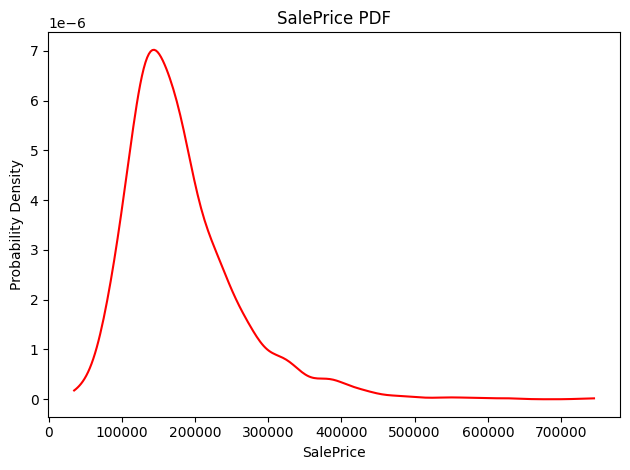

In [86]:
# I needed some way to estimate PDF for SalePrice
# I used gaussian_kde method from scipy library
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

# Generate 300 sale price values for x axis
saleprice_range = np.linspace(y_train.min(), y_train.max(), 300)
# Probability density values for y axis
prob_density_values = gaussian_kde(y_train).pdf(saleprice_range)

plt.plot(saleprice_range, prob_density_values, color='red')
plt.xlabel('SalePrice')
plt.ylabel('Probability Density')
plt.title('SalePrice PDF')
plt.tight_layout()
plt.show()

In [87]:
# I am using subplot method from matplotlib library to display features nicely
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

def plot_feats(dataset, feats, plot_strategy, plots_per_row=3):
    num_feats = len(feats)
    num_rows = (num_feats + plots_per_row - 1) // plots_per_row
    num_plots = num_rows * plots_per_row

    figsize = (15, 5 * num_rows)
    fig, ax = plt.subplots(num_rows, plots_per_row, figsize=figsize)
    # Convert axes to 1d list
    ax = [ax] if num_plots == 1 else ax.flatten()

    # Plot distributions
    for i, feat in enumerate(feats):
        plot_strategy(vals=dataset[feat], ax=ax[i])
        ax[i].set_title(feat)

    # Disable empty plots
    for i in range(num_feats, num_plots):
        ax[i].axis("off")

    # Draw
    plt.tight_layout()
    plt.show()


# Strategy for plotting categorical features
def plot_cat(vals, ax):
    val_cnt = vals.value_counts()
    val_cnt.plot(kind="bar", color="blue", ax=ax)


# Strategy for plotting numerical features
def plot_num(vals, ax):
    vals.hist(bins=20, color="green", ax=ax)


### Plot each numerical feature

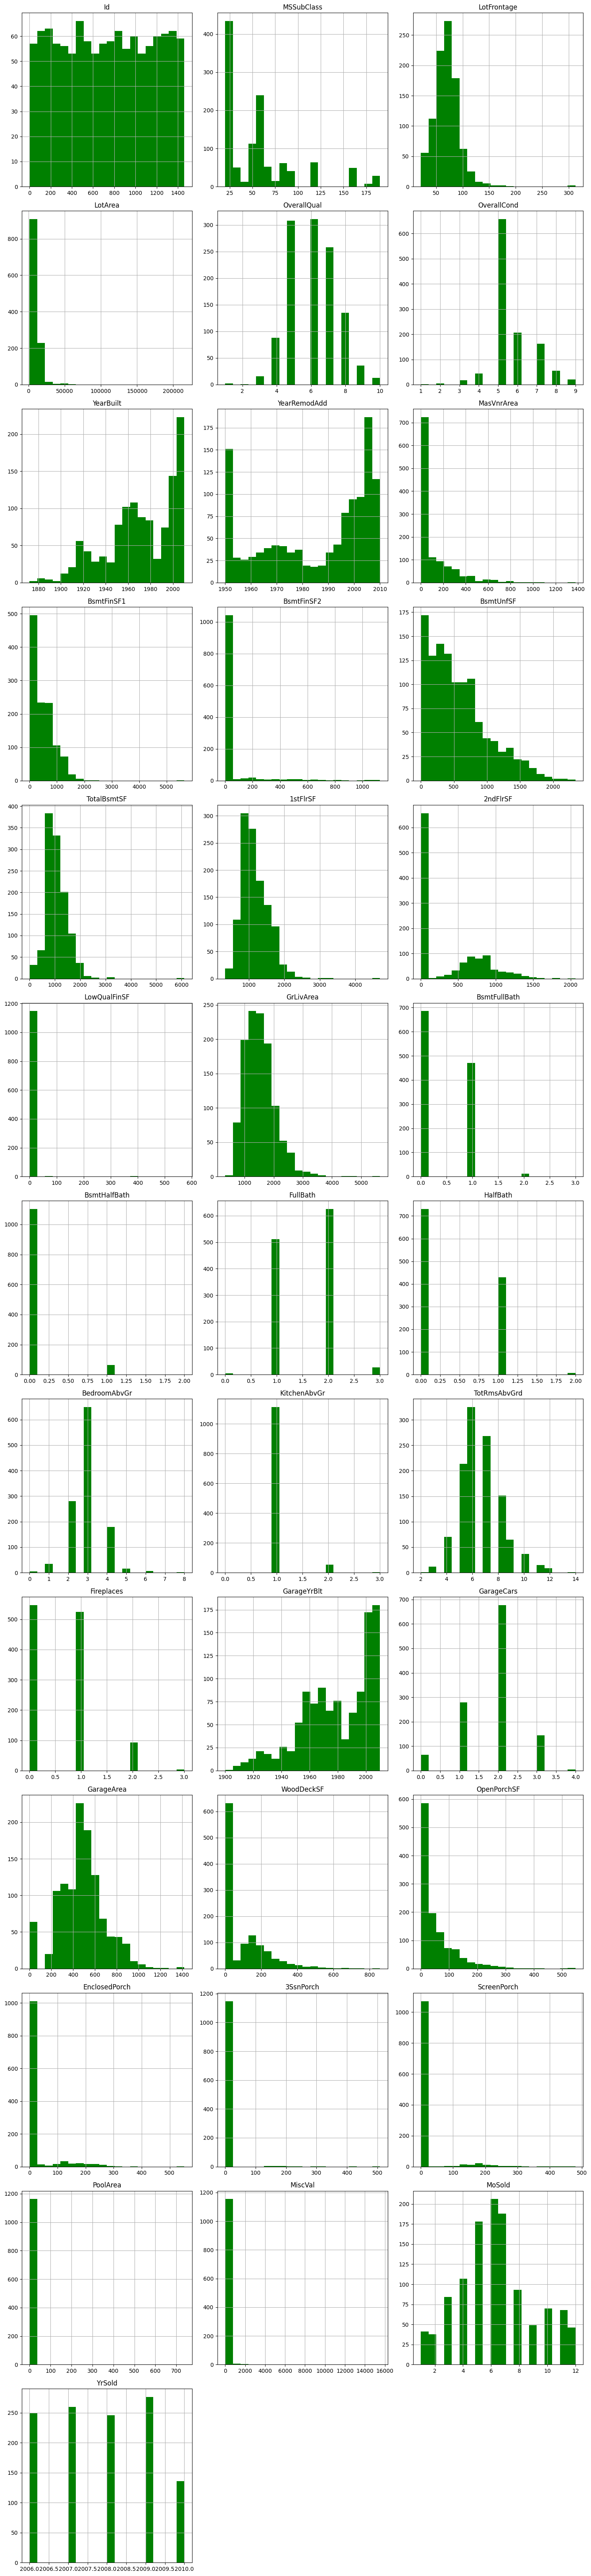

In [88]:
plot_feats(dataset=X_train, feats=feat_num, plot_strategy=plot_num)

### Plot each categorical feature

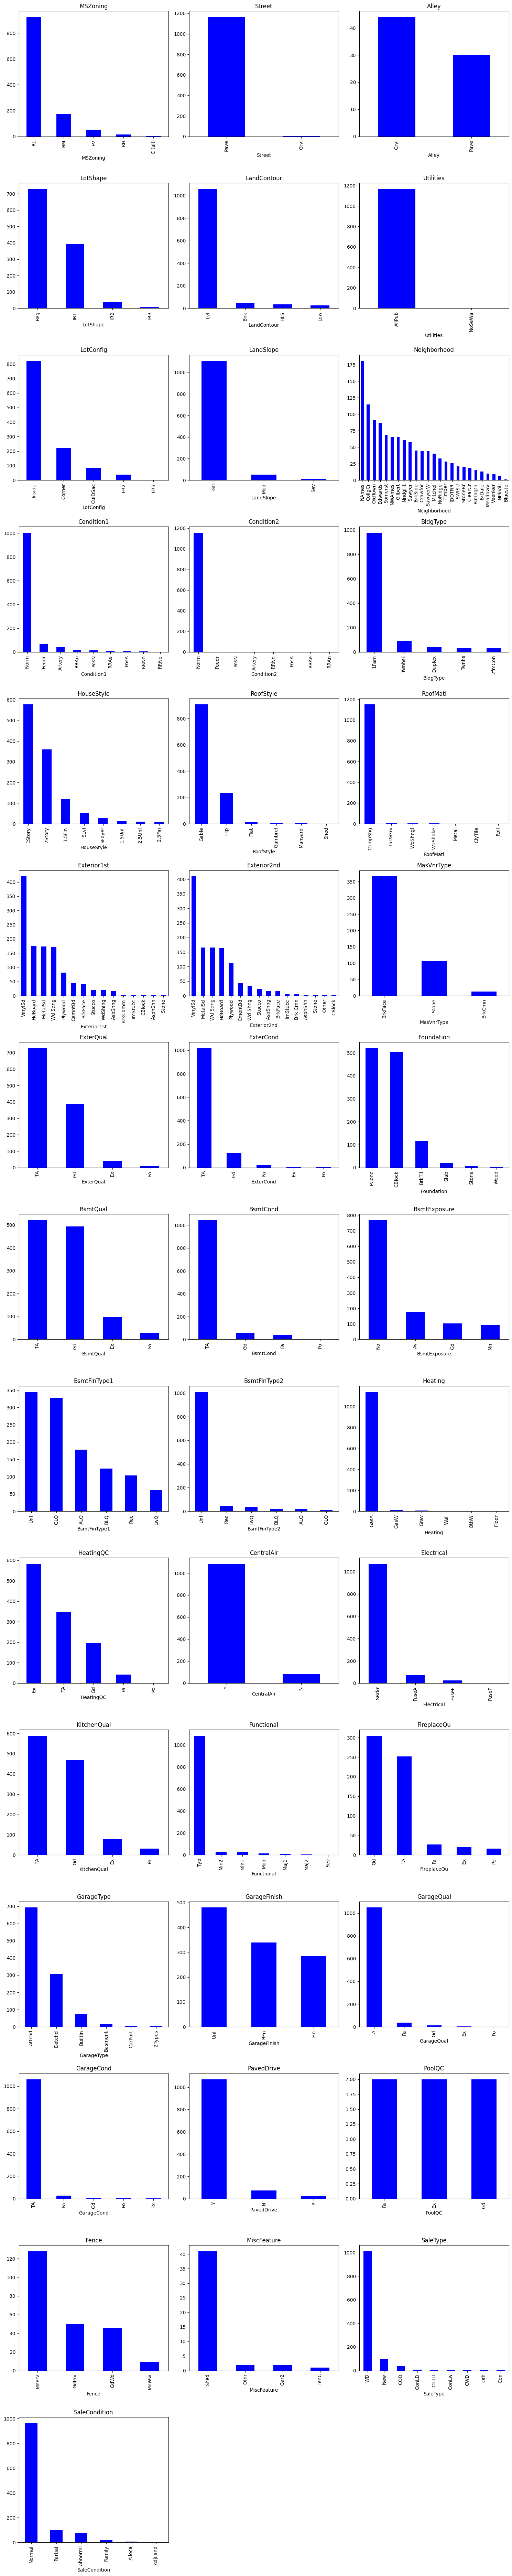

In [89]:
plot_feats(dataset=X_train, feats=feat_cat, plot_strategy=plot_cat)

# Cleaning

In [90]:
# Display every feature that contains N/A values
def find_na(dataset):
    na_dist = dataset.isna().mean()
    for feat, na_ratio in na_dist.items():
        if na_ratio > 0:
            print(feat, na_ratio)

### N/A values in categorical features

In [91]:
find_na(X_train[feat_cat])

Alley 0.9366438356164384
MasVnrType 0.5847602739726028
BsmtQual 0.023972602739726026
BsmtCond 0.023972602739726026
BsmtExposure 0.023972602739726026
BsmtFinType1 0.023972602739726026
BsmtFinType2 0.023972602739726026
Electrical 0.0008561643835616438
FireplaceQu 0.4683219178082192
GarageType 0.0547945205479452
GarageFinish 0.0547945205479452
GarageQual 0.0547945205479452
GarageCond 0.0547945205479452
PoolQC 0.9948630136986302
Fence 0.800513698630137
MiscFeature 0.9606164383561644


### N/A Values in numerical features

In [92]:
find_na(X_train[feat_num])

LotFrontage 0.1857876712328767
MasVnrArea 0.005136986301369863
GarageYrBlt 0.0547945205479452


### Dropping features with high N/A content

In [93]:
# If N/A content is higher that 60% I will drop the feature column in X_train and X_test datasets
drop_feats = ["Alley", "PoolQC", "Fence", "MiscFeature"]

In [94]:
X_train.drop(columns=drop_feats, inplace=True)
X_test.drop(columns=drop_feats, inplace=True)

In [95]:
feat_cat = [feat for feat in feat_cat if feat not in drop_feats]
feat_num = [feat for feat in feat_num if feat not in drop_feats]

In [96]:
# Make sure there high N/A columns are gone
find_na(X_train[feat_cat])

MasVnrType 0.5847602739726028
BsmtQual 0.023972602739726026
BsmtCond 0.023972602739726026
BsmtExposure 0.023972602739726026
BsmtFinType1 0.023972602739726026
BsmtFinType2 0.023972602739726026
Electrical 0.0008561643835616438
FireplaceQu 0.4683219178082192
GarageType 0.0547945205479452
GarageFinish 0.0547945205479452
GarageQual 0.0547945205479452
GarageCond 0.0547945205479452


In [97]:
find_na(X_train[feat_num])

LotFrontage 0.1857876712328767
MasVnrArea 0.005136986301369863
GarageYrBlt 0.0547945205479452


In [98]:
# Replace GarageYrBlt with median value from train set
garage_yr_blt_median = X_train["GarageYrBlt"].median()
print(garage_yr_blt_median)

X_train["GarageYrBlt"] = X_train["GarageYrBlt"].fillna(garage_yr_blt_median)
X_test["GarageYrBlt"] = X_test["GarageYrBlt"].fillna(garage_yr_blt_median)

1980.0


In [99]:
# Replace MasVnrArea with mean value from train set
mas_vnr_area_mean = X_train["MasVnrArea"].mean()
print(mas_vnr_area_mean)

X_train["MasVnrArea"] = X_train["MasVnrArea"].fillna(mas_vnr_area_mean)
X_test["MasVnrArea"] = X_test["MasVnrArea"].fillna(mas_vnr_area_mean)

103.77194492254733


In [100]:
print(X_train["LotFrontage"].dtype)

# Replace LotFrontage with mean value from train set
lot_frontage_mean = X_train["LotFrontage"].mean()
print(lot_frontage_mean)

X_train["LotFrontage"] = X_train["LotFrontage"].fillna(lot_frontage_mean)
X_test["LotFrontage"] = X_test["LotFrontage"].fillna(lot_frontage_mean)

float64
70.34384858044164


In [101]:
X_train["MasVnrType"].mode()[0]

'BrkFace'

In [102]:
def fill_na_with_mode(feat):
    mode = X_train[feat].mode()[0]
    print(feat, mode)
    
    X_train[feat] = X_train[feat].fillna(mode)
    X_test[feat] = X_test[feat].fillna(mode)

In [103]:
# Replace all the following categorical columns with mode
feats_mode = [
    "MasVnrType",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Electrical",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
]

for feat in feats_mode:
    fill_na_with_mode(feat)

MasVnrType BrkFace
BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Electrical SBrkr
FireplaceQu Gd
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA


# Feature Selection (Experiment 1)

In [104]:
params1 = {
    "selected_features": ["OverallQual", "OverallCond"]
}

In [105]:
X_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [106]:
X_train_exp1 = X_train[params1["selected_features"]]
X_test_exp1 = X_test[params1["selected_features"]]

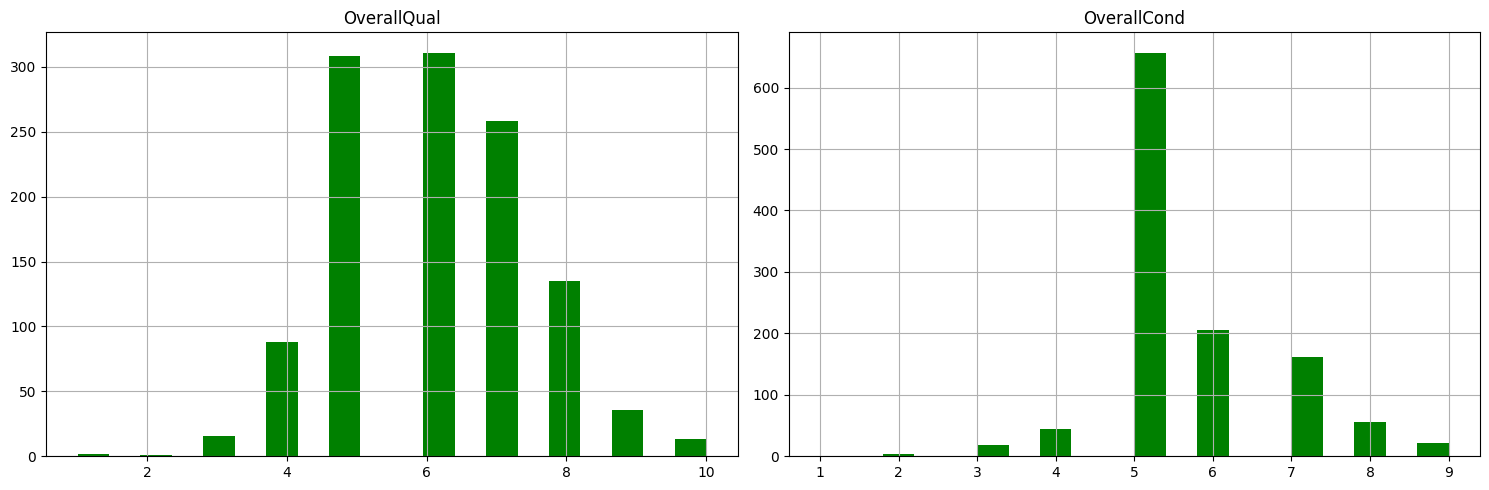

In [107]:
plot_feats(dataset=X_train_exp1, feats=params1["selected_features"], plot_strategy=plot_num, plots_per_row=2)

# Training Functions

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

def train_linear_model(X, y):
    model = LinearRegression()
    
    # Train Linear model using least squares
    model.fit(X, y)

    return model

# Measures model performance using different metrics for the given dataset
def measure_model_performance(model, X, y):
    # R^2 measures correlation between X and y (higher the better)
    R2 = model.score(X, y)

    # Predict y values
    y_pred = model.predict(X)

    # Mean Absolute Error measures on average what is the absolute error (lower the better)
    mae = mean_absolute_error(y, y_pred)

    # Mean Squared Error measures on average what is the squared error, if the error is too high, since
    # MSE function increases faster than MAE, MSE gives you worse score (lower the better)
    mse = mean_squared_error(y, y_pred)

    # Root Mean Squared Error is just square root from MSE, but it may be a better metric, because it is in the same units
    # as SalePrice (lower the better)
    rmse = np.sqrt(mse)

    # Return metric dict for logging
    return {
        "R2": R2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
    }
    
    

# Training (Experiment 1)

In [115]:
model1 = train_linear_model(X_train_exp1, y_train)

In [116]:
measure_model_performance(model1, X_train_exp1, y_train)

{'R2': 0.6171276129454454,
 'MAE': 33626.362565199954,
 'MSE': 2283661641.609882,
 'RMSE': 47787.67248579786}